In [30]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')  # nicer plots


In [31]:
# Step 2: Load the Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_sub = pd.read_csv('gender_submission.csv')

# View first 5 rows of train data
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Step 3: Understand the Data
train_df.info()
train_df.describe()
train_df['Survived'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
Name: count, dtype: int64

In [33]:
# Step 4: Data Cleaning

# Drop 'Cabin' column (too many missing values)
train_df.drop(columns=['Cabin'], inplace=True)

# Fill missing 'Age' with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Check for remaining missing values
print(train_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\AARYAN GHAWALI\AppData\Local\Temp\ipykernel_11136\1858062963.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\AARYAN GHAWALI\AppData\Local\Temp\ipykernel_11136\1858062963.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

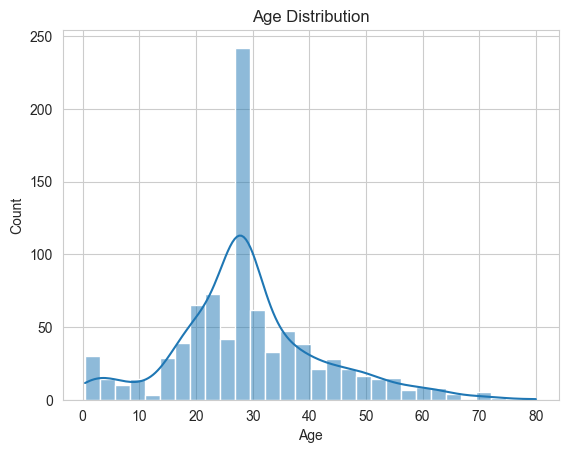

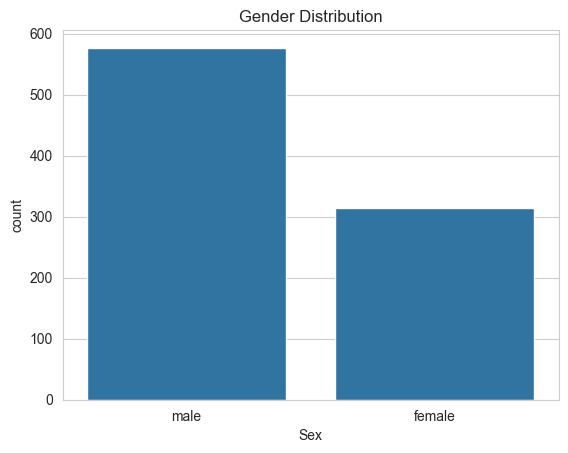

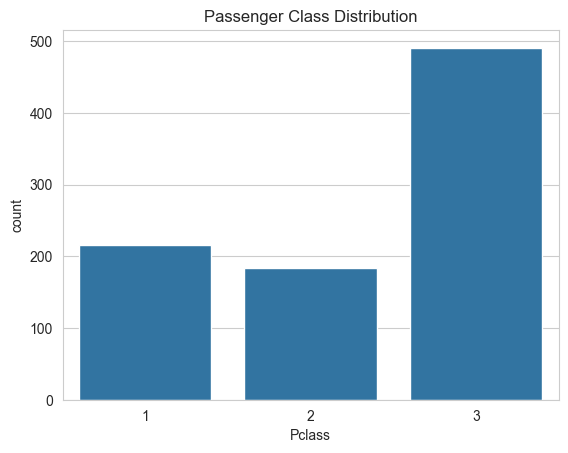

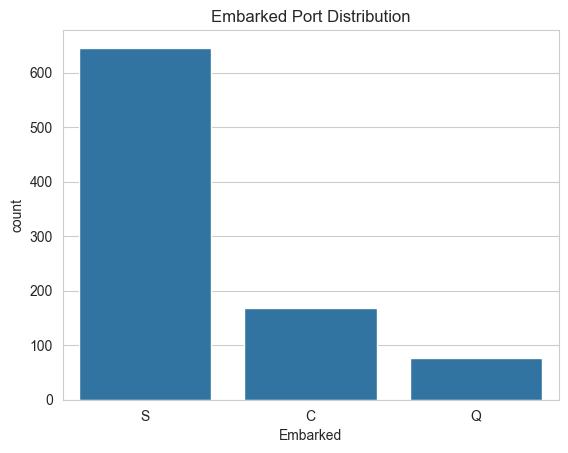

In [34]:
# Step 5: Univariate Analysis

# Age distribution
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Gender distribution
sns.countplot(x='Sex', data=train_df)
plt.title('Gender Distribution')
plt.show()

# Passenger Class distribution
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')
plt.show()

# Embarked port distribution
sns.countplot(x='Embarked', data=train_df)
plt.title('Embarked Port Distribution')
plt.show()


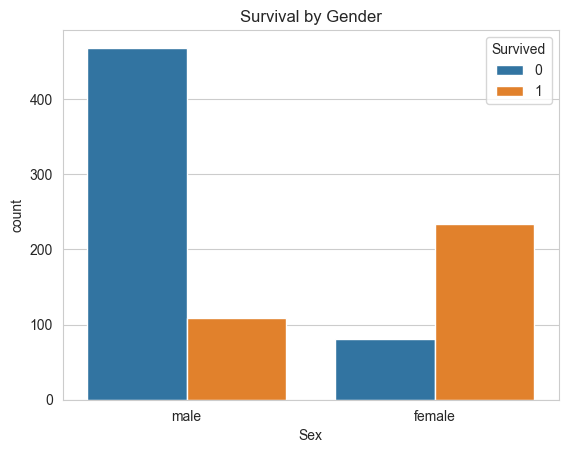

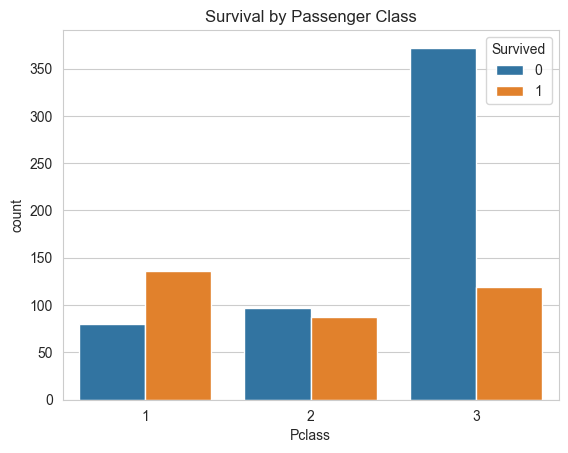

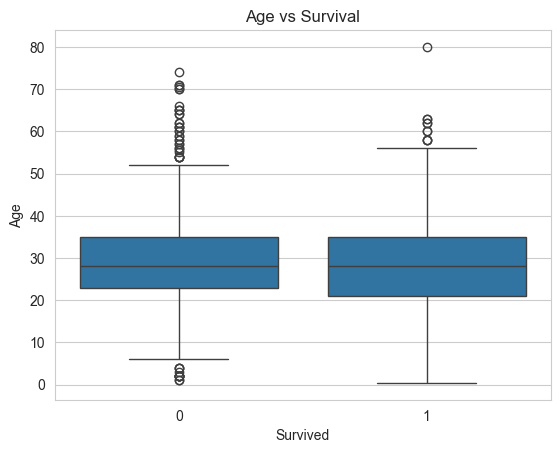

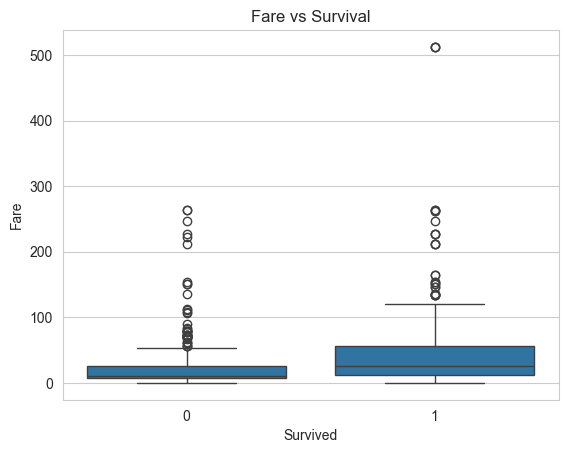

In [35]:
# Step 6: Bivariate Analysis

# Survival count by gender
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.show()

# Survival count by passenger class
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

# Age vs Survival boxplot
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age vs Survival')
plt.show()

# Fare vs Survival boxplot
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare vs Survival')
plt.show()


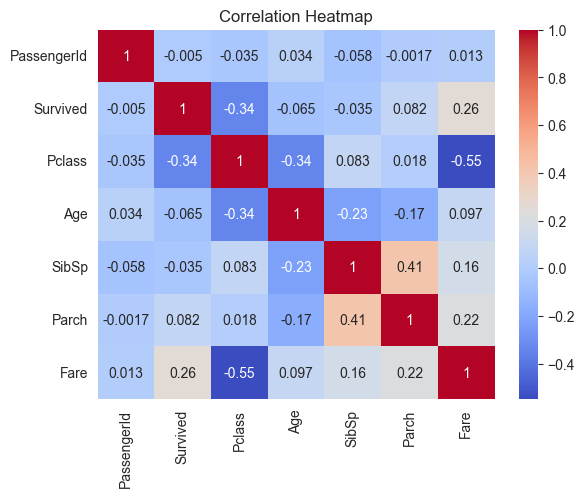

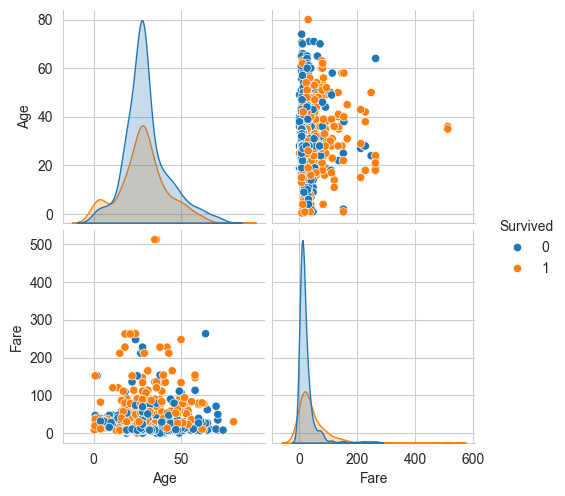

In [36]:
# Step 7: Multivariate Analysis

# Correlation heatmap
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot of Age, Fare, Survived
sns.pairplot(train_df[['Age', 'Fare', 'Survived']], hue='Survived')
plt.show()


In [ ]:
## Observations:

- Females had a higher survival rate than males.
- First-class passengers had better survival chances than 2nd and 3rd class.
- Younger passengers survived more often.
- Higher fare is slightly correlated with survival.
- Most passengers embarked from port 'S' (Southampton).
